Exploratory Data Analysis

 Exploratory Data Analysis (EDA) is the process of examining and visualizing a dataset to
 understand its structure, patterns, and relationships before applying modeling or statistical
 techniques. In EDA projects, analysts use summary statistics, charts, and plots to uncover
 trends, detect anomalies, test assumptions, and gain insights that guide further data
 preprocessing, feature selection, or hypothesis generation.
 Steps for an Exploratory Data Analysis (EDA) Project
 1. Data Collection
 Gather data from sources such as CSV files,Excel files or databases.
 Ensure data is relevant, up to date, and in a usable format.
 2. Data Cleaning
 Handle missing values (e.g., drop, impute).
 Remove or correct duplicate records.
 Fix inconsistent formatting (e.g., date formats, text casing).
 Handle incorrect data entries or outliers.
 Standardize categorical values (e.g., “Yes”, “yes”, “Y”).
 3. Data Understanding
 Review column types and data structure.
 Use summary statistics to understand distributions.
 Identify categorical vs. numerical features.
 Perform sanity checks (e.g., no negative prices, date logic).
 4. Univariate Analysis
 Analyze one feature at a time:
 1.Categorical: frequency counts, bar charts.
 2.Numerical: mean, median, histograms, boxplots.
 5. Bivariate Analysis
 Explore relationships between two variables
 1.Categorical vs. categorical (cross-tabulation).
 2.Numerical vs. categorical (grouped statistics, boxplots).
 3.Numerical vs. numerical (scatter plots, correlation).
 6. Multivariate Analysis
 Analyze interactions between three or more variables.
 Use groupings, pivot tables, or visualizations like pairplots and heatmaps.
 7. Feature Engineering
 Create new variables from existing data (e.g., total profit, sales per unit).
 Convert date/time into useful parts (month, weekday).
 Encode categorical variables if needed (for modeling).
 8. Outlier Detection
 Identify and assess outliers using statistical or visual methods.
 Decide whether to keep, transform, or remove them based on context.
 9. Trend and Pattern Analysis
 Use time series plots to detect seasonal or time-based patterns.
 Segment analysis by region, product category, customer type, etc.
 10. Documentation & Reporting
 Summarize findings with visualizations and insights.
 Clearly communicate actionable recommendations.
 Highlight data quality issues and limitations.

room_booking_dataset



Introduction


This room booking dataset captures detailed operational and customer-related data from a hotel reservation system, providing records of guest bookings, payments, and stay details.
The dataset includes variables such as booking dates, check-in/check-out information, room type, number of guests, booking status, and payment details, with the target variable — Booking_Status — indicating whether a booking was Confirmed, Pending, or Cancelled.

The objective of analyzing this dataset is to identify trends in customer behavior, room utilization, and booking outcomes, helping hotels improve revenue management, enhance guest experience, and optimize occupancy rates.

Dataset Overview

Source: Synthetic hotel reservation records.

Granularity: Each record represents a single booking transaction for a guest.

Variables: Includes customer data (name, email, phone), operational data (room type, room number, number of nights, guests), and financial data (payment method, payment status, total amount).

Target Variable: Booking_Status (Confirmed, Pending, or Cancelled).

Purpose of Analysis

Identify booking trends: Understand customer preferences in room type, length of stay, and booking channels.

Revenue insights: Analyze total amount, payment status, and cancellations to support better pricing and payment policies.

Operational efficiency: Optimize occupancy rates by studying check-in/out dates, guest counts, and room allocation.

Predict cancellations: Build predictive models using booking and payment features to anticipate cancellations and reduce losses.

 Import the necessary libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


Import dataset



In [ ]:
df=pd.read_csv(r"C:\Data_Science\Project\EDA\room_booking\room_booking_dataset.csv")

Display the first 5 rows of the dataset

In [26]:

print(df.head())

  Booking_ID  Customer_Name                  Email                 Phone  \
0  BKG100000       Mark Kim    kevin18@hotmail.com     (102)281-4493x153   
1  BKG100001   Melissa Boyd  michael84@hotmail.com          754.243.9876   
2  BKG100002    James Baker   kimberly55@gmail.com      676-203-9386x956   
3  BKG100003  Amanda Turner     qkennedy@gmail.com  001-645-213-5651x651   
4  BKG100004    Willie Ross   kchristian@gmail.com   (928)626-4979x48499   

  Room_Type  Room_Number Check_In_Date Check_Out_Date  Nights  Guests  \
0    Double          915    2023-06-21     2023-06-28       7       1   
1    Double          744    2023-06-04     2023-06-06       2       1   
2    Double          331    2023-09-03     2023-09-13      10       4   
3     Suite          115    2023-06-26     2023-07-07      11       1   
4     Suite          788    2023-11-06     2023-11-08       2       4   

  Booking_Status Payment_Method Payment_Status Booking_Date  Total_Amount  
0      Cancelled           C

Display the last 5 rows of the dataset

In [27]:
print(df.tail())

     Booking_ID  Customer_Name                             Email  \
9995  BKG109995   Beth Dickson    davidforbes@duncan-carlson.com   
9996  BKG109996  Anne Humphrey           markwalker@martinez.com   
9997  BKG109997   James Lawson  willisstephanie@garcia-banks.com   
9998  BKG109998  Rachel Garcia          nicolestephens@yahoo.com   
9999  BKG109999   Connie Davis       william22@carter-brandt.com   

                      Phone Room_Type  Room_Number Check_In_Date  \
9995  +1-517-349-1009x79658     Suite          552    2023-07-15   
9996   001-896-345-4671x478     Suite          919    2023-08-21   
9997      (065)066-1601x281     Suite          111    2023-06-24   
9998             5415756719    Single          405    2023-02-17   
9999        +1-562-760-0764    Deluxe          497    2023-01-08   

     Check_Out_Date  Nights  Guests Booking_Status Payment_Method  \
9995     2023-07-27      12       3        Pending           Cash   
9996     2023-08-23       2       2        P

Data cleaning

In [28]:
print(df.isna().sum())

Booking_ID        0
Customer_Name     0
Email             0
Phone             0
Room_Type         0
Room_Number       0
Check_In_Date     0
Check_Out_Date    0
Nights            0
Guests            0
Booking_Status    0
Payment_Method    0
Payment_Status    0
Booking_Date      0
Total_Amount      0
dtype: int64


Remove spaces from column names


In [29]:
df.columns = df.columns.str.replace(' ','_')

  Check for duplicate rows
 


In [30]:
df.duplicated().sum()

0

 Transform Timestamp column to datetime
 


In [31]:
df['Booking_Date'] = pd.to_datetime(df['Booking_Date'])

 Data Understanding

Basic information about the dataset


In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Booking_ID      10000 non-null  object        
 1   Customer_Name   10000 non-null  object        
 2   Email           10000 non-null  object        
 3   Phone           10000 non-null  object        
 4   Room_Type       10000 non-null  object        
 5   Room_Number     10000 non-null  int64         
 6   Check_In_Date   10000 non-null  object        
 7   Check_Out_Date  10000 non-null  object        
 8   Nights          10000 non-null  int64         
 9   Guests          10000 non-null  int64         
 10  Booking_Status  10000 non-null  object        
 11  Payment_Method  10000 non-null  object        
 12  Payment_Status  10000 non-null  object        
 13  Booking_Date    10000 non-null  datetime64[ns]
 14  Total_Amount    10000 non-null  float64       
dtypes: 

 Use summary statistics to understand distributions.


In [33]:
df.describe()

,Room_Number,Nights,Guests,Booking_Date,Total_Amount
count,10000.000000,10000.000000,10000.000000,10000,10000.000000
mean,548.525400,7.520100,2.493200,2023-06-01 17:48:37.440000256,13542.457338
min,100.000000,1.000000,1.000000,2022-11-04 00:00:00,2000.230000
25%,324.000000,4.000000,1.000000,2023-03-03 00:00:00,7792.945000
50%,548.000000,8.000000,2.000000,2023-06-01 12:00:00,13504.325000
75%,776.000000,11.000000,3.000000,2023-09-01 00:00:00,19330.045000
max,998.000000,14.000000,4.000000,2023-12-29 00:00:00,24999.250000
std,260.636904,4.012556,1.118606,NaN,6628.914201


1.How many bookings were successful vs. canceled? (Booking_Status)

Booking_Status
Pending      3358
Cancelled    3322
Confirmed    3320
Name: count, dtype: int64


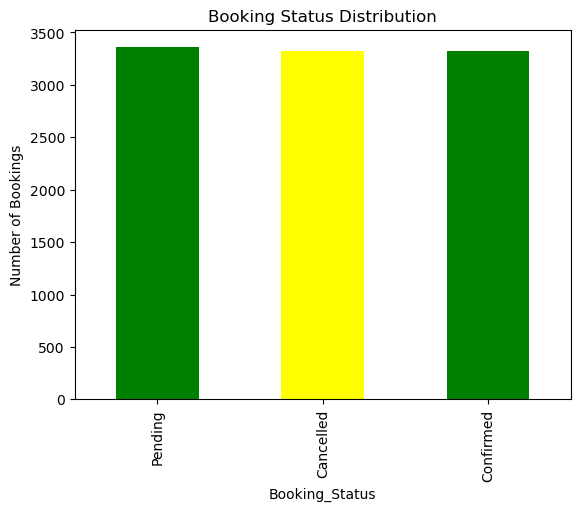

In [34]:
status_counts = df['Booking_Status'].value_counts()
print(status_counts)
status_counts.plot(kind='bar', color=['green','yellow'])
plt.title("Booking Status Distribution")
plt.ylabel("Number of Bookings")
plt.show()


2.What is the distribution of number of guests per booking?

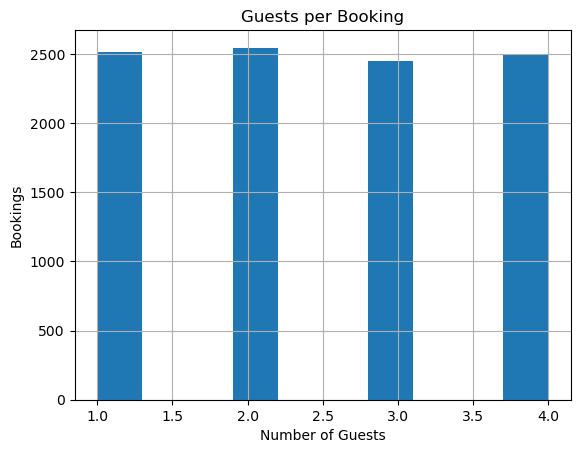

In [35]:
df['Guests'].hist(bins=10)
plt.title("Guests per Booking")
plt.xlabel("Number of Guests")
plt.ylabel("Bookings")
plt.show()


3. How many nights do customers usually stay?

count    10000.000000
mean         7.520100
std          4.012556
min          1.000000
25%          4.000000
50%          8.000000
75%         11.000000
max         14.000000
Name: Nights, dtype: float64


<Axes: >

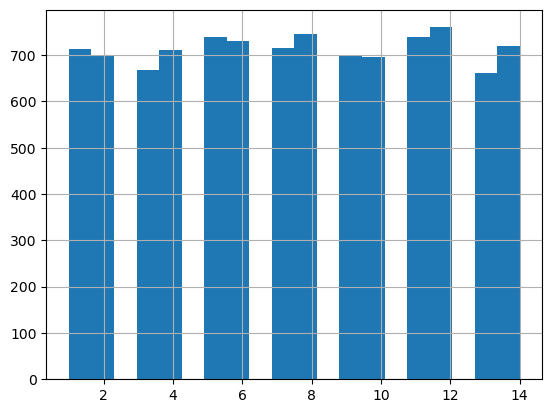

In [36]:
print(df['Nights'].describe())
df['Nights'].hist(bins=20)



4.Which payment methods are most popular?

Payment_Method
Online    2524
Cash      2516
Card      2509
UPI       2451
Name: count, dtype: int64


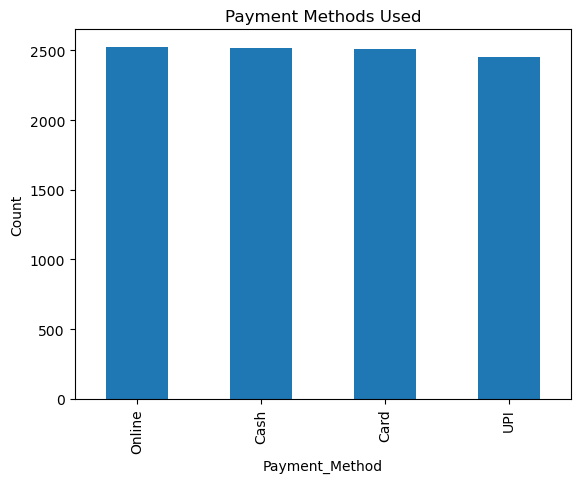

In [37]:
payment_counts = df['Payment_Method'].value_counts()
print(payment_counts)
payment_counts.plot(kind='bar')
plt.title("Payment Methods Used")
plt.ylabel("Count")
plt.show()


5.What is the average total amount paid per booking?

Average Total Amount: 13542.457338


<Axes: >

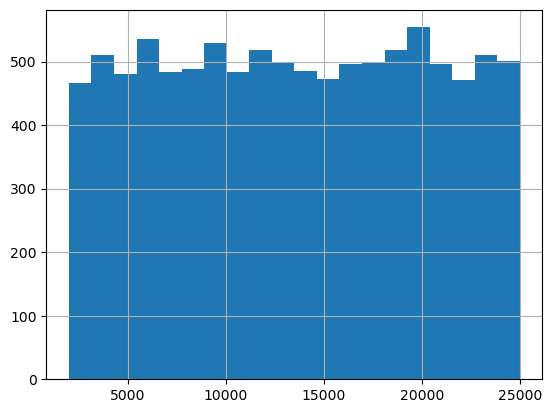

In [38]:
print("Average Total Amount:", df['Total_Amount'].mean())
df['Total_Amount'].hist(bins=20)



6.Which days have the highest check-ins?

Check_In_Date
Sunday       1491
Wednesday    1454
Thursday     1431
Saturday     1415
Monday       1412
Friday       1401
Tuesday      1396
Name: count, dtype: int64


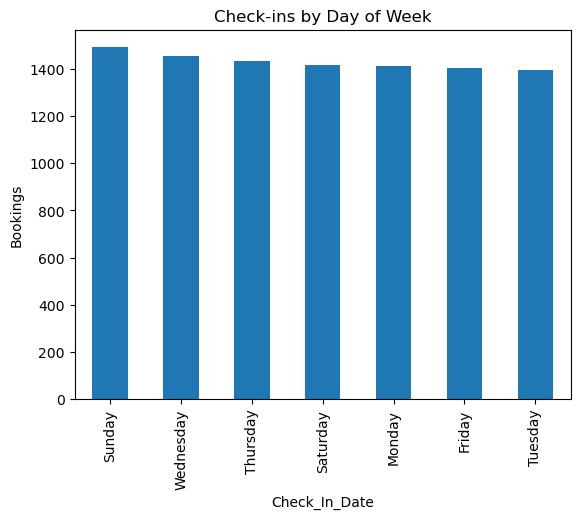

In [39]:
df['Check_In_Date'] = pd.to_datetime(df['Check_In_Date'])
checkin_counts = df['Check_In_Date'].dt.day_name().value_counts()
print(checkin_counts)
checkin_counts.plot(kind='bar')
plt.title("Check-ins by Day of Week")
plt.ylabel("Bookings")
plt.show()


7.Which room numbers are most frequently used?

Room_Number
152    21
424    20
887    20
822    20
344    19
406    19
884    19
840    19
425    19
997    19
Name: count, dtype: int64


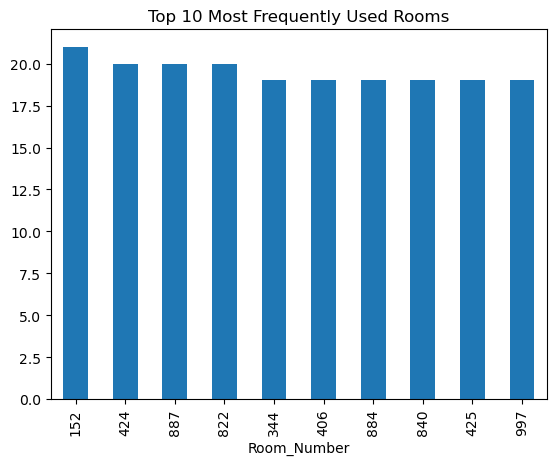

In [40]:
roomnum_counts = df['Room_Number'].value_counts().head(10)
print(roomnum_counts)
roomnum_counts.plot(kind='bar')
plt.title("Top 10 Most Frequently Used Rooms")
plt.show()


8.Which customers (top names) have made the most bookings?

In [41]:
top_customers = df['Customer_Name'].value_counts().head(10)
print(top_customers)


Customer_Name
John Williams          7
Jennifer Anderson      6
Michael Brown          5
Christopher Johnson    5
Jennifer Johnson       5
William Smith          5
James Davis            4
Matthew Brown          4
Jennifer Rodriguez     4
Kimberly Jones         4
Name: count, dtype: int64


9.Which months have the highest total revenue?


In [42]:
df['Check_Out_Date'] = pd.to_datetime(df['Check_Out_Date'])
monthly_revenue = df.groupby(df['Check_Out_Date'].dt.to_period('M'))['Total_Amount'].sum()
print(monthly_revenue)



Check_Out_Date
2023-01     8392722.98
2023-02    10833345.51
2023-03    11589182.81
2023-04    10717262.23
2023-05    11054804.50
2023-06    11408774.51
2023-07    11542321.79
2023-08    12076336.56
2023-09    10757612.62
2023-10    11612776.51
2023-11    11177962.82
2023-12    11710764.09
2024-01     2550706.45
Freq: M, Name: Total_Amount, dtype: float64


10.Which day of the week has the most check-outs

Check_Out_Date
Wednesday    1469
Tuesday      1453
Saturday     1441
Thursday     1422
Monday       1415
Friday       1402
Sunday       1398
Name: count, dtype: int64


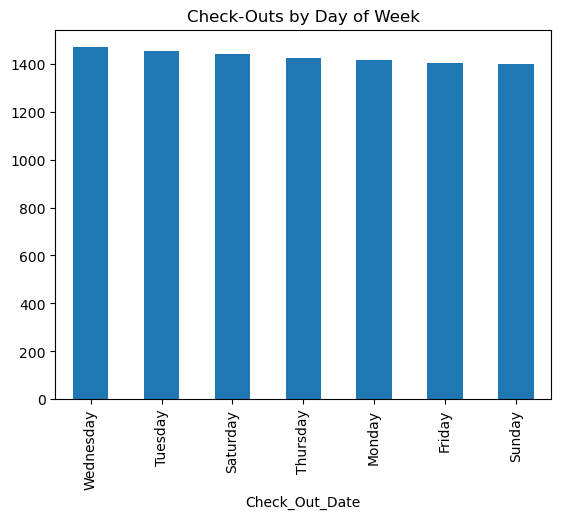

In [43]:
df['Check_Out_Date'] = pd.to_datetime(df['Check_Out_Date'])
checkout_counts = df['Check_Out_Date'].dt.day_name().value_counts()
print(checkout_counts)
checkout_counts.plot(kind='bar')
plt.title("Check-Outs by Day of Week")
plt.show()


11.Relationship between number of guests and total amount paid

<Figure size 10000x900 with 0 Axes>

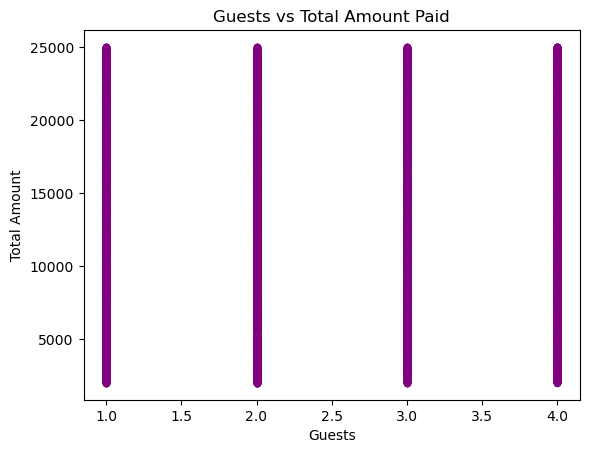

In [ ]:
df.plot(kind='scatter', x='Guests', y='Total_Amount', alpha=1.0, color='purple')
plt.title("Guests vs Total Amount Paid")
plt.xlabel("Guests")
plt.ylabel("Total Amount")
plt.show()



12.What percentage of bookings are cancelled?

In [ ]:
print(df['Booking_Status'].value_counts(normalize=True) * 100)

Booking_Status
Pending      33.58
Cancelled    33.22
Confirmed    33.20
Name: proportion, dtype: float64


13. Do longer stays have higher cancellation rates?

In [ ]:
print(df.groupby('Booking_Status')['Nights'].mean())

Booking_Status
Cancelled    7.571042
Confirmed    7.478313
Pending      7.511018
Name: Nights, dtype: float64


14. Which payment method has the highest cancellation rate?

In [ ]:
print(df.groupby('Payment_Method')['Booking_Status'].value_counts(normalize=True).unstack().fillna(0))

Booking_Status  Cancelled  Confirmed   Pending
Payment_Method                                
Card             0.341969   0.328816  0.329215
Cash             0.326709   0.347377  0.325914
Online           0.326862   0.326466  0.346672
UPI              0.333333   0.325173  0.341493


15. How many total bookings are there?

In [ ]:
print(len(df))

10000


Suggestions & Recommendations for Room Booking Data EDA
1. Reduce Booking Cancellations & Improve Scheduling

Observation: A high percentage of bookings are marked as Cancelled or No-Show, which impacts occupancy and revenue.

Recommendations:

Use predictive models to identify customers likely to cancel (based on booking date, lead time, payment method).

Introduce flexible pricing policies for early confirmations.

Offer incentives (discounts, loyalty points) for guests who maintain bookings.

2. Address High-Cancellation Customers or Sources

Observation: Certain customers, room types, or booking channels show higher cancellation rates.

Recommendations:

Monitor high-risk customer profiles and require prepayment for them.

Rebalance room allocation across channels with lower cancellations.

Improve communication with guests (reminders, confirmations) to reduce no-shows.

3. Seasonal & Peak-Time Insights

Observation: Bookings vary by Check-In Date, with spikes during weekends, holidays, or seasonal events.

Recommendations:

Apply seasonal forecasting models to predict peak demand.

Adjust dynamic pricing during holidays or weekends.

Optimize staffing levels to match seasonal booking demand.

4. Room & Revenue Utilization Optimization

Observation: Some room types (e.g., suites) are underutilized compared to standard rooms.

Recommendations:

Use upselling strategies to promote premium rooms (discounted upgrades, package deals).

Apply demand-based room assignment to balance utilization across room types.

Track occupancy vs. revenue metrics to improve yield management.

5. Customer & Operational Behavior Metrics

Observation: Bookings with large groups or long stays show different behavior compared to single-night or solo bookings.

Recommendations:

Differentiate between leisure (long stays, families) vs. business (short stays, solo) guests for better forecasting.

Improve personalized offers (family packages, business deals).

Match room assignment and amenities to guest profiles.